In [1]:
import scipy.io as sio
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from scipy import misc
from skimage import transform,data
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import joblib
from sklearn import metrics
from sklearn import preprocessing
import spectral

In [2]:
def load_data(path): 
    csv_path = os.path.join('/Users/aurora/Desktop/CSV/2011/',path)
    return pd.read_csv(csv_path)

In [3]:
train_data = load_data('train_data.csv')
test_data = load_data('test_data.csv')

In [4]:
train_x = train_data.drop(['label'],1)
train_y = train_data['label']
test_x = test_data.drop(['label'],1)
test_y = test_data['label']

# save model

In [6]:
clf = RandomForestClassifier(n_estimators=50,random_state=0)
clf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [8]:
pred=clf.predict(test_x)
accuracy=metrics.accuracy_score(test_y,pred)*100
print(accuracy)

93.5954860101


In [9]:
joblib.dump(clf,"randomforest_model2011.m")

['randomforest_model2011.m']

In [7]:
def show_accuracy(x,y,string):
    acc = list(np.equal(x,y)).count(True)/(len(x))
    print(string,' acc=',' ',acc)
x=clf.predict(train_data.drop(['label'],1))
y=train_y
show_accuracy(x,y,'ceshi')

ceshi  acc=   0.99992728859158


In [8]:
x=clf.predict(test_data.drop(['label'],1))
y=test_y
show_accuracy(x,y,'ceshi')

ceshi  acc=   0.9359548601012158


# 读模型

In [5]:
clf=joblib.load("randomforest_model2011.m")

# 20111207

In [6]:
data=np.load('/Users/aurora/Desktop/nielamu/20111207_np.npy')

In [7]:
new_pic = np.zeros(shape=(data.shape[1],data.shape[2]))

In [8]:
for i in range(data.shape[1]):
    try:
        need_pre = data[:,i,:]
        need_pre = np.transpose(need_pre,(1,0))
        pre = clf.predict(need_pre)
        new_pic[i,:]=pre
    except:
        print(i)

121
501
3092


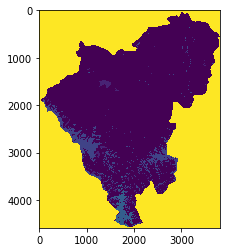

In [9]:
new_pic = np.where(data[0,:,:]==65536,10,new_pic[:,:])
np.save('20111207.npy',new_pic)
plt.imshow(new_pic)
plt.show()

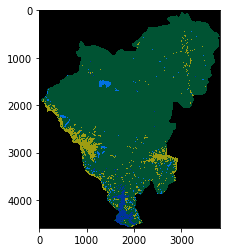

In [26]:
pic = np.zeros(shape=(data.shape[1],data.shape[2],3))
for i in range(4):
    if i==0:
        color=(0,173,205)
        pic[:,:,0] = np.where(new_pic[:,:]==i,color[0],pic[:,:,0])
        pic[:,:,1] = np.where(new_pic[:,:]==i,color[1],pic[:,:,1])
        pic[:,:,2] = np.where(new_pic[:,:]==i,color[2],pic[:,:,2])
    elif i==1:
        color=(255,144,30)
        pic[:,:,0] = np.where(new_pic[:,:]==i,color[0],pic[:,:,0])
        pic[:,:,1] = np.where(new_pic[:,:]==i,color[1],pic[:,:,1])
        pic[:,:,2] = np.where(new_pic[:,:]==i,color[2],pic[:,:,2])
    elif i==2:
        color=(99,99,238)
        pic[:,:,0] = np.where(new_pic[:,:]==i,color[0],pic[:,:,0])
        pic[:,:,1] = np.where(new_pic[:,:]==i,color[1],pic[:,:,1])
        pic[:,:,2] = np.where(new_pic[:,:]==i,color[2],pic[:,:,2])
    elif i==3:
        color=(0,205,102)
        pic[:,:,0] = np.where(new_pic[:,:]==i,color[0],pic[:,:,0])
        pic[:,:,1] = np.where(new_pic[:,:]==i,color[1],pic[:,:,1])
        pic[:,:,2] = np.where(new_pic[:,:]==i,color[2],pic[:,:,2])
    elif i==3:
        color=(255,255,255)
        pic[:,:,0] = np.where(new_pic[:,:]==10,color[0],pic[:,:,0])
        pic[:,:,1] = np.where(new_pic[:,:]==10,color[1],pic[:,:,1])
        pic[:,:,2] = np.where(new_pic[:,:]==10,color[2],pic[:,:,2])
plt.imshow(pic)
plt.show()

In [27]:
cv2.imwrite('/Users/aurora/Desktop/nielamu/2011.png',pic)

True

# 2011分类统计

In [13]:
for i in range(4):
    mask = (new_pic==i)
    print(i,' ',new_pic[mask].size)

0   7677983
1   134489
2   591965
3   141070


# 20061006

In [10]:
data=np.load('/Users/aurora/Desktop/nielamu/20061006_np.npy')

In [11]:
new_pic = np.zeros(shape=(data.shape[1],data.shape[2]))

In [12]:
for i in range(data.shape[1]):
    try:
        need_pre = data[:,i,:]
        need_pre = np.transpose(need_pre,(1,0))
        pre = clf.predict(need_pre)
        new_pic[i,:]=pre
    except:
        print(i)

1132
1142
1143
1144
1163
1168


In [13]:
new_pic = np.where(data[0,:,:]==65536,10,new_pic[:,:])
np.save('20061006.npy',new_pic)

# 2006分类统计

In [18]:
for i in range(4):
    mask = (new_pic==i)
    print(i,' ',new_pic[mask].size)

0   7551463
1   113781
2   705942
3   174321


# 20011024

In [14]:
data=np.load('/Users/aurora/Desktop/nielamu/20011024_np.npy')

In [15]:
new_pic = np.zeros(shape=(data.shape[1],data.shape[2]))

In [16]:
for i in range(data.shape[1]):
    try:
        need_pre = data[:,i,:]
        need_pre = np.transpose(need_pre,(1,0))
        pre = clf.predict(need_pre)
        new_pic[i,:]=pre
    except:
        print(i)

1133
1134
1135
1141
1149
1150


In [17]:
new_pic = np.where(data[0,:,:]==65536,10,new_pic[:,:])
np.save('20011024.npy',new_pic)

# 2001分类统计

In [23]:
for i in range(4):
    mask = (new_pic==i)
    print(i,' ',new_pic[mask].size)

0   7798711
1   122128
2   489928
3   134740


# 20091030

In [18]:
data=np.load('/Users/aurora/Desktop/nielamu/20091030_np.npy')

In [19]:
new_pic = np.zeros(shape=(data.shape[1],data.shape[2]))

In [20]:
for i in range(data.shape[1]):
    try:
        need_pre = data[:,i,:]
        need_pre = np.transpose(need_pre,(1,0))
        pre = clf.predict(need_pre)
        new_pic[i,:]=pre
    except:
        print(i)

3294
3301


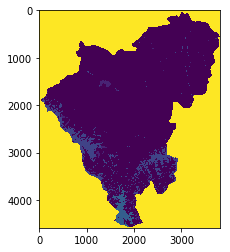

In [21]:
new_pic = np.where(data[0,:,:]==65536,10,new_pic[:,:])
np.save('20091030.npy',new_pic)
plt.imshow(new_pic)
plt.show()

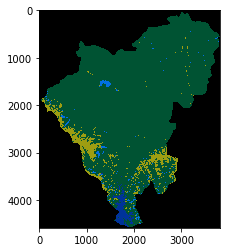

In [14]:
pic = np.zeros(shape=(data.shape[1],data.shape[2],3))
for i in range(4):
    if i==0:
        color=(0,173,205)
        pic[:,:,0] = np.where(new_pic[:,:]==i,color[0],pic[:,:,0])
        pic[:,:,1] = np.where(new_pic[:,:]==i,color[1],pic[:,:,1])
        pic[:,:,2] = np.where(new_pic[:,:]==i,color[2],pic[:,:,2])
    elif i==1:
        color=(255,144,30)
        pic[:,:,0] = np.where(new_pic[:,:]==i,color[0],pic[:,:,0])
        pic[:,:,1] = np.where(new_pic[:,:]==i,color[1],pic[:,:,1])
        pic[:,:,2] = np.where(new_pic[:,:]==i,color[2],pic[:,:,2])
    elif i==2:
        color=(99,99,238)
        pic[:,:,0] = np.where(new_pic[:,:]==i,color[0],pic[:,:,0])
        pic[:,:,1] = np.where(new_pic[:,:]==i,color[1],pic[:,:,1])
        pic[:,:,2] = np.where(new_pic[:,:]==i,color[2],pic[:,:,2])
    elif i==3:
        color=(0,205,102)
        pic[:,:,0] = np.where(new_pic[:,:]==i,color[0],pic[:,:,0])
        pic[:,:,1] = np.where(new_pic[:,:]==i,color[1],pic[:,:,1])
        pic[:,:,2] = np.where(new_pic[:,:]==i,color[2],pic[:,:,2])
    elif i==3:
        color=(255,255,255)
        pic[:,:,0] = np.where(new_pic[:,:]==10,color[0],pic[:,:,0])
        pic[:,:,1] = np.where(new_pic[:,:]==10,color[1],pic[:,:,1])
        pic[:,:,2] = np.where(new_pic[:,:]==10,color[2],pic[:,:,2])
plt.imshow(pic)
plt.show()

In [15]:
cv2.imwrite('/Users/aurora/Desktop/nielamu/2009.png',pic)

True

# 2009分类统计

In [16]:
for i in range(4):
    mask = (new_pic==i)
    print(i,' ',new_pic[mask].size)

0   7719035
1   120059
2   565457
3   140956


# 20031201

In [22]:
data=np.load('/Users/aurora/Desktop/nielamu/20031201_np.npy')

In [23]:
new_pic = np.zeros(shape=(data.shape[1],data.shape[2]))

In [24]:
for i in range(data.shape[1]):
    try:
        need_pre = data[:,i,:]
        need_pre = np.transpose(need_pre,(1,0))
        pre = clf.predict(need_pre)
        new_pic[i,:]=pre
    except:
        print(i)

1130
1131
1391
1392
3829


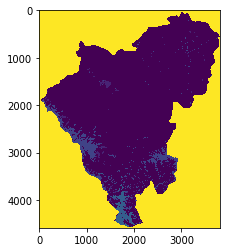

In [25]:
new_pic = np.where(data[0,:,:]==65536,10,new_pic[:,:])
np.save('20031201.npy',new_pic)
plt.imshow(new_pic)
plt.show()

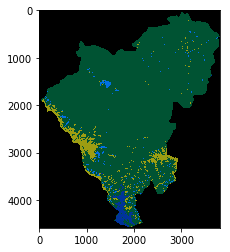

In [21]:
pic = np.zeros(shape=(data.shape[1],data.shape[2],3))
for i in range(4):
    if i==0:
        color=(0,173,205)
        pic[:,:,0] = np.where(new_pic[:,:]==i,color[0],pic[:,:,0])
        pic[:,:,1] = np.where(new_pic[:,:]==i,color[1],pic[:,:,1])
        pic[:,:,2] = np.where(new_pic[:,:]==i,color[2],pic[:,:,2])
    elif i==1:
        color=(255,144,30)
        pic[:,:,0] = np.where(new_pic[:,:]==i,color[0],pic[:,:,0])
        pic[:,:,1] = np.where(new_pic[:,:]==i,color[1],pic[:,:,1])
        pic[:,:,2] = np.where(new_pic[:,:]==i,color[2],pic[:,:,2])
    elif i==2:
        color=(99,99,238)
        pic[:,:,0] = np.where(new_pic[:,:]==i,color[0],pic[:,:,0])
        pic[:,:,1] = np.where(new_pic[:,:]==i,color[1],pic[:,:,1])
        pic[:,:,2] = np.where(new_pic[:,:]==i,color[2],pic[:,:,2])
    elif i==3:
        color=(0,205,102)
        pic[:,:,0] = np.where(new_pic[:,:]==i,color[0],pic[:,:,0])
        pic[:,:,1] = np.where(new_pic[:,:]==i,color[1],pic[:,:,1])
        pic[:,:,2] = np.where(new_pic[:,:]==i,color[2],pic[:,:,2])
    elif i==3:
        color=(255,255,255)
        pic[:,:,0] = np.where(new_pic[:,:]==10,color[0],pic[:,:,0])
        pic[:,:,1] = np.where(new_pic[:,:]==10,color[1],pic[:,:,1])
        pic[:,:,2] = np.where(new_pic[:,:]==10,color[2],pic[:,:,2])
plt.imshow(pic)
plt.show()

In [22]:
cv2.imwrite('/Users/aurora/Desktop/nielamu/2003.png',pic)

True

# 2003分类统计

In [23]:
for i in range(4):
    mask = (new_pic==i)
    print(i,' ',new_pic[mask].size)

0   7779687
1   122962
2   501149
3   141709


# mask叠加

In [27]:
def apply_mask(image, mask, color, mask_num=1,alpha=0.5):
    """Apply the given mask to the image.
    """
    for c in range(3):
        image[:, :, c] = np.where(mask == mask_num,
                                  image[:, :, c] *
                                  (1 - alpha) + alpha * color[c],
                                  image[:, :, c])
    return image

In [28]:
im = misc.imread("/Users/aurora/Desktop/小论文3/分类图/2001landsat.png")
print(im.shape)

(4590, 3809, 3)


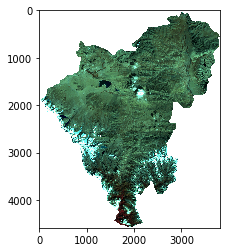

In [29]:
plt.imshow(im)
plt.show()

In [30]:
pic=np.load('/Users/aurora/Desktop/npy/20011024.npy')

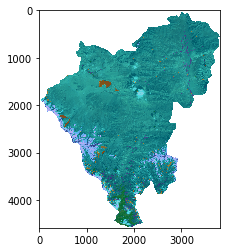

In [31]:
img=pic[:]
for i in range(5):
    if i==0:
        color=(0,173,205)
    elif i==1:
        color=(255,144,30)
    elif i==2:
        color=(99,99,238)
    elif i==3:
        color=(0,205,102)
    elif i==10:
        color=(255,255,255)
    im = apply_mask(im,pic,color,mask_num=i,alpha=0.5)
plt.imshow(im)
plt.show()

In [32]:
cv2.imwrite('/Users/aurora/Desktop/npy/2001.png',im)

True